In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter, date2num, AutoDateLocator, AutoDateFormatter

In [2]:
# Load john hopkins CSV
data = pd.read_csv(r'https://raw.githubusercontent.com/datasets/covid-19/main/data/time-series-19-covid-combined.csv')

                   

In [3]:
# Just select case data
case_data = data.iloc[:, 0:4]

# Select countries of interest
countries = ['Vietnam', 'Malaysia', 'Philippines', 'Australia']
cases_countries = case_data.loc[case_data['Country/Region'].isin(countries)]

In [4]:
# data check
cases_countries['Country/Region'].value_counts()

# Aus data by states not whole country

Australia      6528
Philippines     816
Vietnam         816
Malaysia        816
Name: Country/Region, dtype: int64

In [5]:
# group by country, to fix aus data
final_cases = cases_countries.groupby(['Date', 'Country/Region'])['Confirmed'].sum().reset_index()

In [6]:
# data check
final_cases['Country/Region'].value_counts()
final_cases.loc[(final_cases['Country/Region'] == "Australia") & (final_cases.Date == "2022-04-10")]

,Date,Country/Region,Confirmed
3236,2022-04-10,Australia,5108366


In [7]:
# convert data to pd.datetime
final_cases.Date = pd.to_datetime(final_cases.Date)
#format='%b/%Y'

In [8]:
# Data current cumulative cases
# # Calculate new cases per day
temp = final_cases.groupby(['Country/Region', 'Date', ])['Confirmed']
temp = temp.sum().diff().reset_index()
mask = temp['Country/Region'] != temp['Country/Region'].shift(1)
temp.loc[mask, 'Confirmed'] = np.nan
# renaming columns
temp.columns = ['Country/Region', 'Date', 'New_cases']
# merging new values
final_cases = pd.merge(final_cases, temp, on=['Country/Region', 'Date'])
# filling na with 0
final_cases = final_cases.fillna(0)
# fixing data types
cols = ['New_cases']
final_cases[cols] = final_cases[cols].astype('int')
final_cases['New_cases'] = final_cases['New_cases'].apply(lambda x: 0 if x<0 else x)

In [9]:
# Create dataframe for each country and smooth new cases per day to 7-day moving average
vietnam_cases =  final_cases.loc[final_cases['Country/Region'] == 'Vietnam']
vietnam_cases.set_index(vietnam_cases.Date)
vietnam_cases['mov_avg'] = vietnam_cases['New_cases'].rolling(7).mean()
vietnam_cases['mov_avg_pop'] = vietnam_cases['mov_avg']/9.734



malay_cases = final_cases.loc[final_cases['Country/Region'] == 'Malaysia']
malay_cases.set_index(malay_cases.Date)
malay_cases['mov_avg'] = malay_cases['New_cases'].rolling(7).mean()
malay_cases['mov_avg_pop'] = malay_cases['mov_avg']/3.27


phil_cases = final_cases.loc[final_cases['Country/Region'] == 'Philippines']
phil_cases.set_index(phil_cases.Date)
phil_cases['mov_avg'] = phil_cases['New_cases'].rolling(7).mean()
phil_cases['mov_avg_pop'] = phil_cases['mov_avg']/10.96


aus_cases = final_cases.loc[final_cases['Country/Region'] == 'Australia']
aus_cases.set_index(aus_cases.Date)
aus_cases['mov_avg'] = aus_cases['New_cases'].rolling(7).mean()
aus_cases['mov_avg_pop'] = aus_cases['mov_avg']/2.569



C:\Users\ehug0006\Miniconda3\envs\autumn\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\ehug0006\Miniconda3\envs\autumn\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\ehug0006\Miniconda3\envs\autumn\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [10]:
phil_cases['mov_avg_pop'].loc[phil_cases.Date=='2021-04-05']

1758    932.012513
Name: mov_avg_pop, dtype: float64

In [11]:
# checking data
vietnam_cases

# 7-day moving average seems very high

,Date,Country/Region,Confirmed,New_cases,mov_avg,mov_avg_pop
3,2020-01-22,Vietnam,0,0,NaN,NaN
7,2020-01-23,Vietnam,2,2,NaN,NaN
11,2020-01-24,Vietnam,2,0,NaN,NaN
15,2020-01-25,Vietnam,2,0,NaN,NaN
19,2020-01-26,Vietnam,2,0,NaN,NaN
23,2020-01-27,Vietnam,2,0,NaN,NaN
27,2020-01-28,Vietnam,2,0,0.285714,0.029352
31,2020-01-29,Vietnam,2,0,0.285714,0.029352
35,2020-01-30,Vietnam,2,0,0.000000,0.000000
39,2020-01-31,Vietnam,2,0,0.000000,0.000000


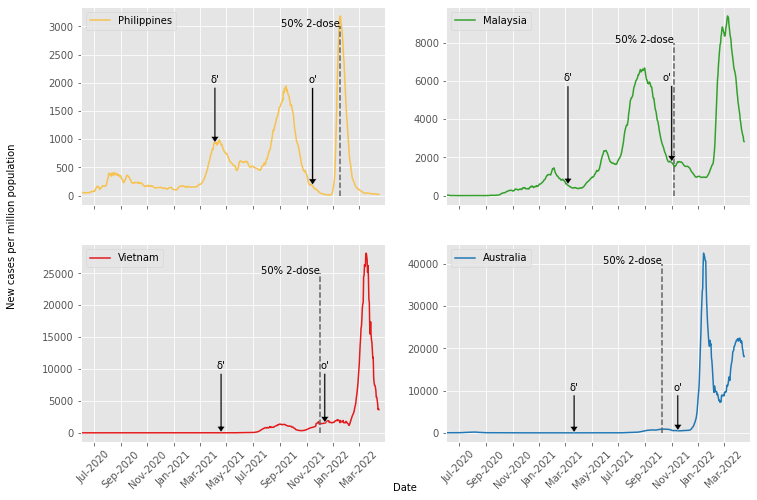

In [40]:
# plotting countries same axis

# set arrowprop for annotation
arrow = dict(facecolor='black', shrink=0.01, width=1.8, headwidth=8, headlength=6)

# first delta case each country
phil_delta = '2021-04-05'
malay_delta = '2021-03-08'
viet_delta = '2021-04-19'
aus_delta = '2021-03-22'

#first omicron case each country
phil_omi = '2021-11-15'
malay_omi = '2021-11-01'
viet_omi = '2021-12-13'
aus_omi = '2021-11-15'

# plot style
plt.style.use("ggplot") #plots in ggplot style, handles dates better


# plotting countries
fig, ax = plt.subplots(2, 2, figsize=(12,8), sharex="all")  # Create a figure and an axes.\

#phili
ax[0,0].plot(phil_cases.Date, phil_cases.mov_avg_pop, color='#f7c24f', label='Philippines')
#ax[1,1].grid(True)
#ax[1,1].set_facecolor('white')
ax[0,0].legend(loc='upper left')
ax[0,0].set(xlim=('2020-06-01', '2022-04-30'))
ax[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax[0,0].annotate("δ'", 
                 xy=(phil_delta, phil_cases['mov_avg_pop'].loc[phil_cases.Date==phil_delta]), 
                 xytext=(phil_delta, 2000), 
                 arrowprops=arrow, 
                 ha='center')
ax[0,0].annotate("o'", 
                 xy=(phil_omi, phil_cases['mov_avg_pop'].loc[phil_cases.Date==phil_omi]), 
                 xytext=(phil_omi, 2000), 
                 arrowprops=arrow, 
                 ha='center')
ax[0,0].vlines(x='2022-01-17', ymin=0, ymax=3000, ls='dashed', color='#636363')
ax[0,0].annotate("50% 2-dose", 
                 xy=('2022-01-16', 3000),
                ha='right')

# malay
ax[0,1].plot(malay_cases.Date, malay_cases.mov_avg_pop, color='#33a02c', label='Malaysia')
#ax[0,1].grid(False)
#ax[0,1].set_facecolor('white')
ax[0,1].legend(loc='upper left')
ax[0,1].annotate("δ'", 
                 xy=(malay_delta, malay_cases['mov_avg_pop'].loc[malay_cases.Date==malay_delta]), 
                 xytext=(malay_delta, 6000), 
                 arrowprops=arrow, 
                 ha='center')
ax[0,1].annotate("o'", 
                 xy=(malay_omi, malay_cases['mov_avg_pop'].loc[malay_cases.Date==malay_omi]), 
                 xytext=(malay_omi, 6000), 
                 arrowprops=arrow, 
                 ha='right')
ax[0,1].vlines(x='2021-11-06', ymin=0, ymax=8000, ls='dashed', color='#636363')
ax[0,1].annotate("50% 2-dose", 
                 xy=('2021-11-05', 8000),
                ha='right')

#vietnam
ax[1,0].plot(vietnam_cases.Date, vietnam_cases.mov_avg_pop, color='#e31a1c', label='Vietnam')
#ax[1,0].grid(False)
#ax[1,0].set_facecolor('white')
ax[1,0].legend(loc='upper left')
ax[1,0].annotate("δ'", 
                 xy=(viet_delta, vietnam_cases['mov_avg_pop'].loc[vietnam_cases.Date==viet_delta]), 
                 xytext=(viet_delta, 10000), 
                 arrowprops=arrow, 
                 ha='center')
ax[1,0].annotate("o'", 
                 xy=(viet_omi, vietnam_cases['mov_avg_pop'].loc[vietnam_cases.Date==viet_omi]), 
                 xytext=(viet_omi, 10000), 
                 arrowprops=arrow, 
                 ha='center')
ax[1,0].vlines(x='2021-12-02', ymin=0, ymax=25000, ls='dashed', color='#636363')
ax[1,0].annotate("50% 2-dose", 
                 xy=('2021-12-01', 25000),
                ha='right')

# aus cases
ax[1,1].plot(aus_cases.Date, aus_cases.mov_avg_pop, color='#1f78b4', label='Australia')
#ax[0,0].grid(False)
#ax[0,0].set_facecolor('white')
ax[1,1].legend(loc='upper left')
ax[1,1].annotate("δ'", 
                 xy=(aus_delta, aus_cases['mov_avg_pop'].loc[aus_cases.Date==aus_delta]), 
                 xytext=(aus_delta, 10000), 
                 arrowprops=arrow, 
                 ha='center')
ax[1,1].annotate("o'", 
                 xy=(aus_omi, aus_cases['mov_avg_pop'].loc[aus_cases.Date==aus_omi]), 
                 xytext=(aus_omi, 10000), 
                 arrowprops=arrow, 
                 ha='center')
ax[1,1].vlines(x='2021-10-10', ymin=0, ymax=40000, ls='dashed', color='#636363')
ax[1,1].annotate("50% 2-dose", 
                 xy=('2021-10-09', 40000),
                ha='right')


# formt and plot
fig.text(0.5, 0.04, 'Date', ha='center')
fig.text(0.04, 0.5, 'New cases per million population', va='center', rotation='vertical')
plt.xticks(rotation=45)
for a in ax.reshape(-1):
    a.tick_params(axis='x', labelrotation=45)
plt.show()